# Loading data

In [1]:
import pandas as pd

In [15]:
file_path = "../data/00/data.csv"
df = pd.read_csv(file_path)

df.head()

t  device_time_stamp  right_pupil_validity  left_pupil_validity  \
0  1.581362e+15       1.958681e+10                   1.0                  1.0   
1  1.581362e+15       1.958682e+10                   1.0                  1.0   
2  1.581362e+15       1.958682e+10                   1.0                  1.0   
3  1.581362e+15       1.958683e+10                   1.0                  1.0   
4  1.581362e+15       1.958684e+10                   1.0                  1.0   

   right_gaze_direction_validity  left_gaze_direction_validity  \
0                            1.0                           1.0   
1                            1.0                           1.0   
2                            1.0                           1.0   
3                            1.0                           1.0   
4                            1.0                           1.0   

   right_pupil_position_validity  left_pupil_position_validity  \
0                            1.0                           1.0   
1                            1.0                           1.0   
2                            1.0                           1.0   
3                            1.0                           1.0   
4                            1.0                           1.0   

   right_gaze_origin_validity  left_gaze_origin_validity  ...  \
0                         1.0                        1.0  ...   
1                         1.0                        1.0  ...   
2                         1.0                        1.0  ...   
3                         1.0                        1.0  ...   
4                         1.0                        1.0  ...   

   right_gaze_direction_unit_vector_x  right_gaze_direction_unit_vector_y  \
0                           -0.010208                           -0.416336   
1                           -0.018433                           -0.426529   
2                           -0.003845                           -0.424973   
3                           -0.015793                           -0.429733   
4                           -0.018921                           -0.424728   

   right_gaze_direction_unit_vector_z  left_gaze_direction_unit_vector_x  \
0                            0.909149                          -0.151428   
1                            0.904282                          -0.161667   
2                            0.905182                          -0.165756   
3                            0.902802                          -0.166397   
4                            0.905106                          -0.163971   

   left_gaze_direction_unit_vector_y  left_gaze_direction_unit_vector_z  \
0                          -0.397919                           0.904831   
1                          -0.396362                           0.903732   
2                          -0.404755                           0.899261   
3                          -0.403870                           0.899536   
4                          -0.404816                           0.899567   

   right_pupil_position_in_tracking_area_x  \
0                                 0.483577   
1                                 0.485436   
2                                 0.482842   
3                                 0.485428   
4                                 0.486599   

   right_pupil_position_in_tracking_area_y  \
0                                 0.670738   
1                                 0.673628   
2                                 0.673311   
3                                 0.675181   
4                                 0.674295   

   left_pupil_position_in_tracking_area_x  \
0                                0.529318   
1                                0.531834   
2                                0.533464   
3                                0.534325   
4                                0.534670   

   left_pupil_position_in_tracking_area_y  
0                                0.569009  
1                                0.569071  
2             

In [16]:
selected_columns = ["t", "right_gaze_origin_position_in_hmd_coordinates_x", "right_gaze_origin_position_in_hmd_coordinates_y"]
df_new = df[selected_columns]

df_new = df_new.rename(columns={
    "right_gaze_origin_position_in_hmd_coordinates_x": "x",
    "right_gaze_origin_position_in_hmd_coordinates_y": "y"
})

df_new.head()

t          x         y
0  1.581362e+15 -29.585846  1.740021
1  1.581362e+15 -29.591797  1.740555
2  1.581362e+15 -29.599228  1.711990
3  1.581362e+15 -29.606445  1.710693
4  1.581362e+15 -29.615341  1.769791

## timestamp normalization

#### min-max

In [17]:
df_new["t"] = (df_new["t"] - df_new["t"].min()) / (df_new["t"].max() - df_new["t"].min())

df_new.head()

t          x         y
0  0.000000 -29.585846  1.740021
1  0.000008 -29.591797  1.740555
2  0.000016 -29.599228  1.711990
3  0.000024 -29.606445  1.710693
4  0.000032 -29.615341  1.769791

## Plotting eyes movement

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

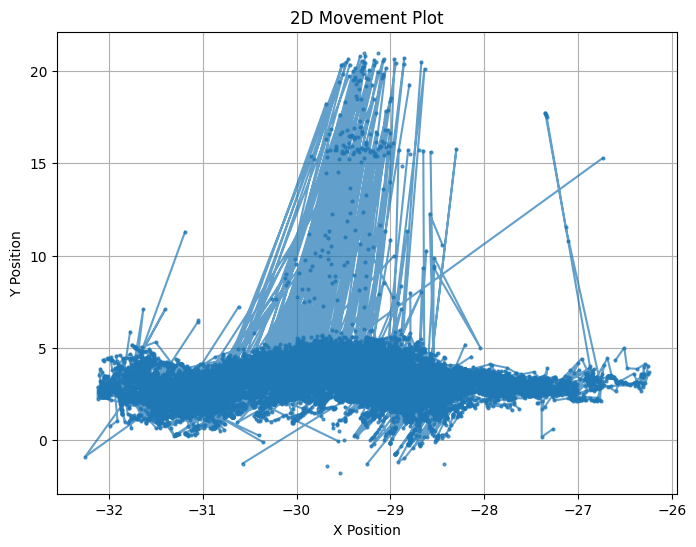

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(df_new["x"], df_newimport matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot of movement (x, y, t as z-axis)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df_selected["x"], df_selected["y"], df_selected["t"], marker='o', linestyle='-', markersize=2, alpha=0.7)

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Time (Normalized)")
ax.set_title("3D Movement Plot (X, Y, Time)")

plt.show()
["y"], marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("2D Movement Plot")
plt.grid(True)
plt.show()

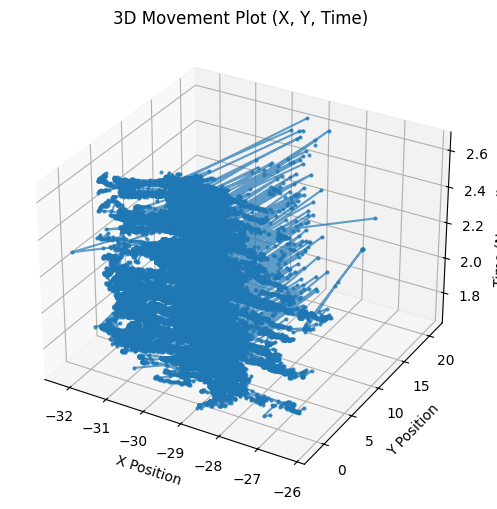

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df_new["x"], df_new["y"], df_new["t"], marker='o', linestyle='-', markersize=2, alpha=0.7)

ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_zlabel("Time (Normalized)")
ax.set_title("3D Movement Plot (X, Y, Time)")

plt.show()

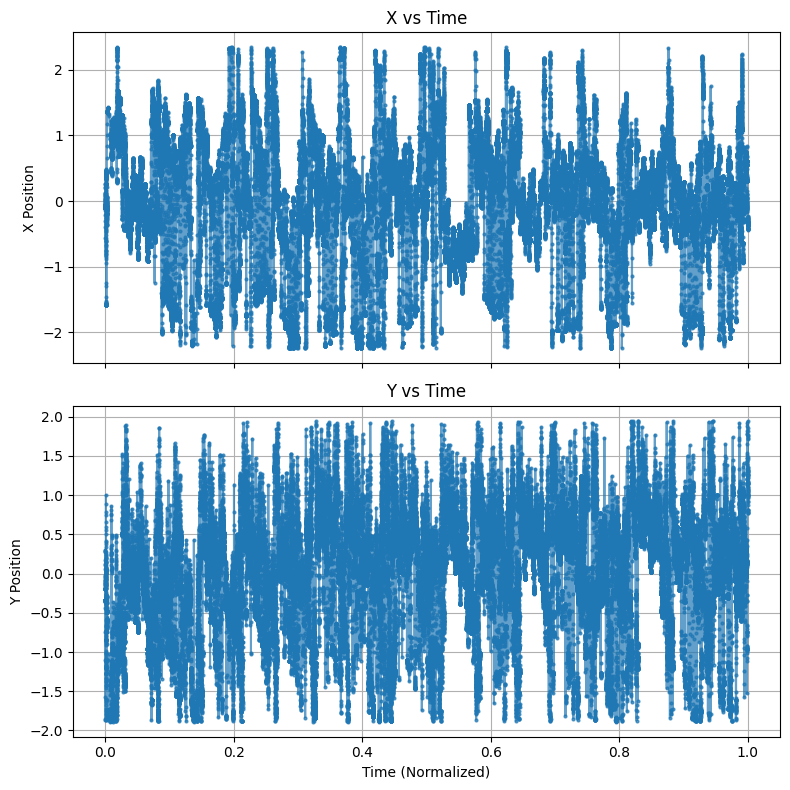

In [21]:
def xy_plot():
    fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
    
    axes[0].plot(df_new["t"], df_new["x"], marker='o', linestyle='-', markersize=2, alpha=0.7)
    axes[0].set_ylabel("X Position")
    axes[0].set_title("X vs Time")
    axes[0].grid(True)
    
    axes[1].plot(df_new["t"], df_new["y"], marker='o', linestyle='-', markersize=2, alpha=0.7)
    axes[1].set_xlabel("Time (Normalized)")
    axes[1].set_ylabel("Y Position")
    axes[1].set_title("Y vs Time")
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

xy_plot()

## position normalization

In [18]:
# df_new = df_new.fillna(0)

df_new["x"] = (df_new["x"] - df_new["x"].mean()) / df_new["x"].std()
df_new["y"] = (df_new["y"] - df_new["y"].mean()) / df_new["y"].std()

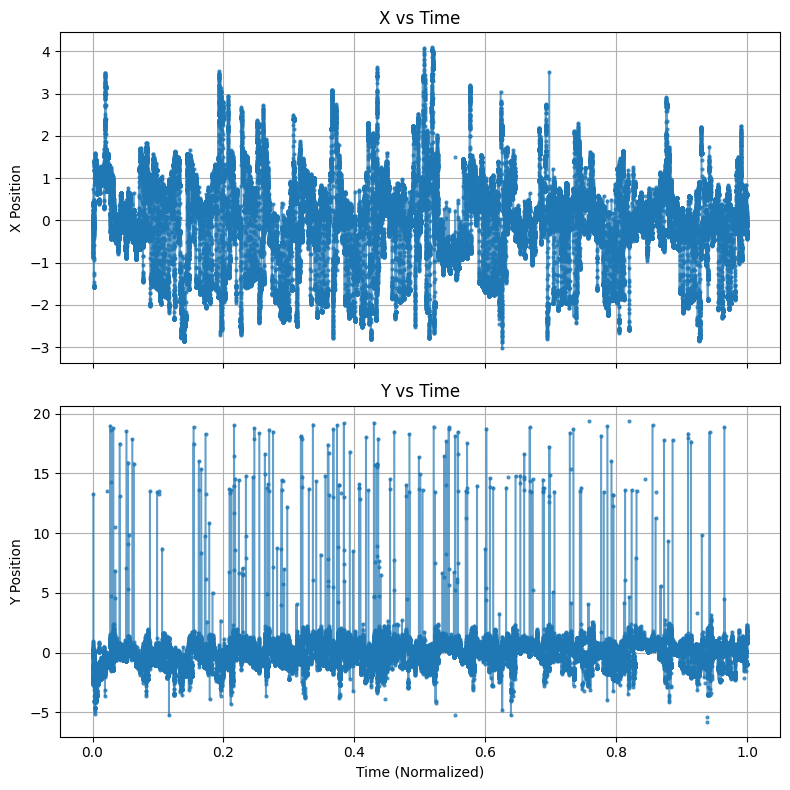

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

axes[0].plot(df_new["t"], df_new["x"], marker='o', linestyle='-', markersize=2, alpha=0.7)
axes[0].set_ylabel("X Position")
axes[0].set_title("X vs Time")
axes[0].grid(True)

axes[1].plot(df_new["t"], df_new["y"], marker='o', linestyle='-', markersize=2, alpha=0.7)
axes[1].set_xlabel("Time (Normalized)")
axes[1].set_ylabel("Y Position")
axes[1].set_title("Y vs Time")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Dropping outliers

In [20]:
Q1_x = df_new["x"].quantile(0.25)
Q3_x = df_new["x"].quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = df_new["y"].quantile(0.25)
Q3_y = df_new["y"].quantile(0.75)
IQR_y = Q3_y - Q1_y

lower_x, upper_x = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x
lower_y, upper_y = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y

df_new = df_new[(df_new["x"] >= lower_x) & (df_new["x"] <= upper_x)]
df_new = df_new[(df_new["y"] >= lower_y) & (df_new["y"] <= upper_y)]

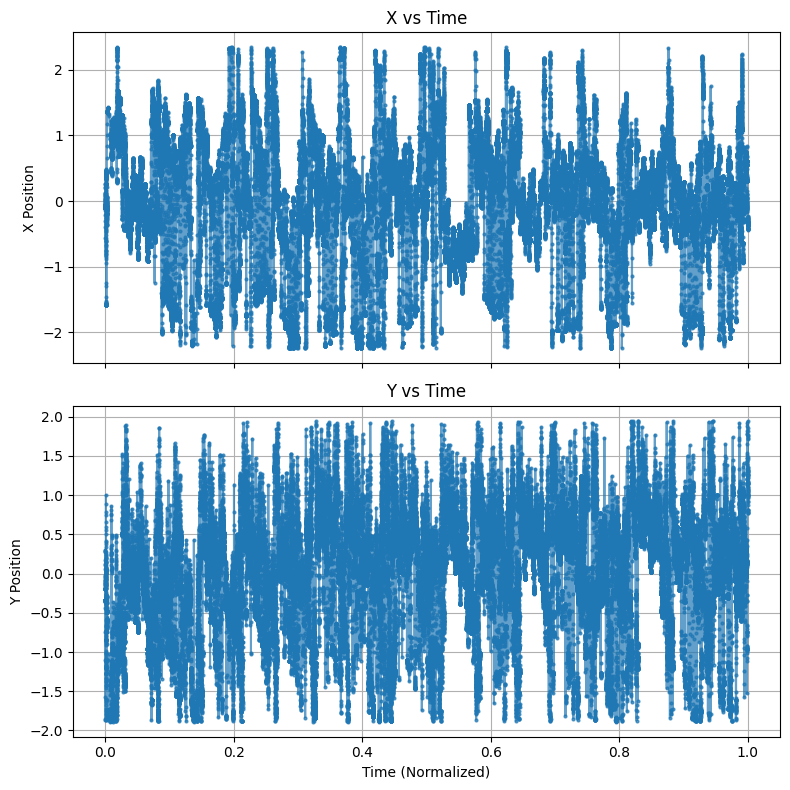

In [22]:
xy_plot()

## calculating distance to origin

In [23]:
import numpy as np

In [24]:
df_new["d"] = np.sqrt(df_new["x"]**2 + df_new["y"]**2)

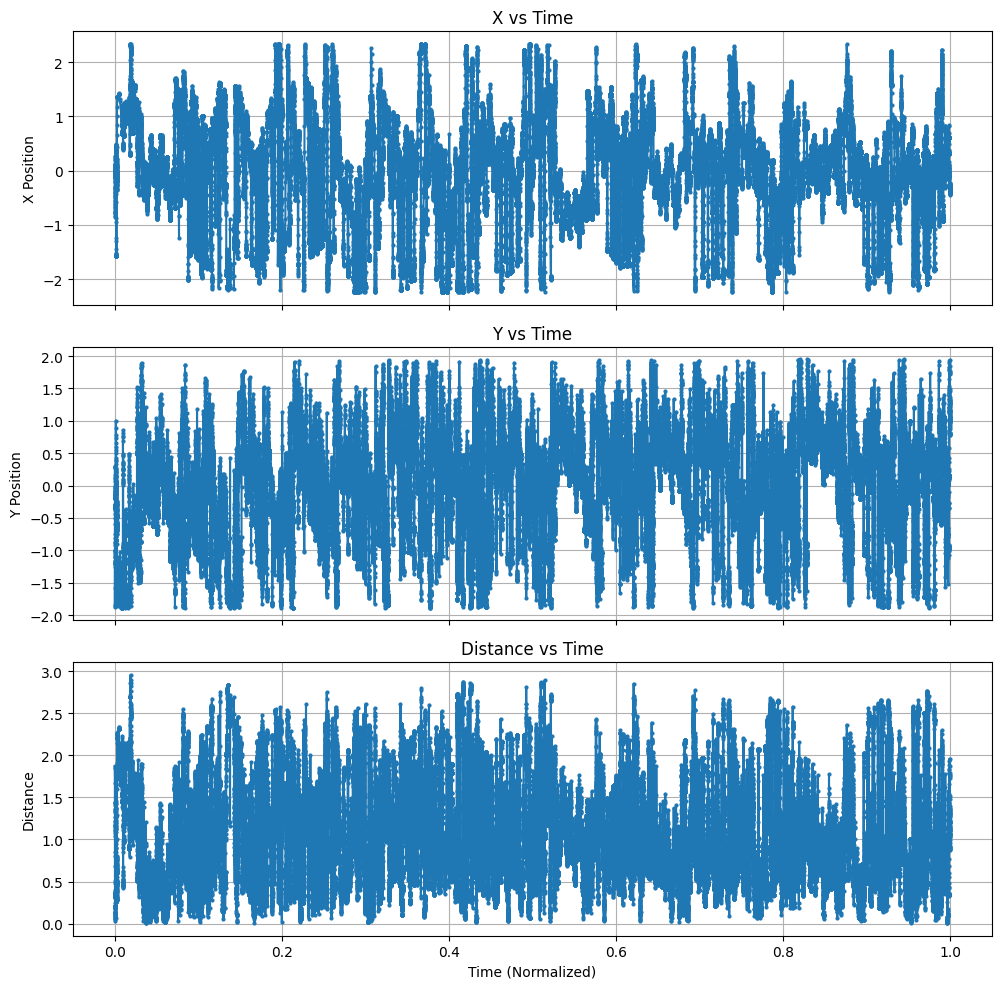

In [25]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df_new["t"], df_new["x"], marker='o', linestyle='-', markersize=2)
axs[0].set_ylabel("X Position")
axs[0].set_title("X vs Time")
axs[0].grid(True)

axs[1].plot(df_new["t"], df_new["y"], marker='o', linestyle='-', markersize=2)
axs[1].set_ylabel("Y Position")
axs[1].set_title("Y vs Time")
axs[1].grid(True)

axs[2].plot(df_new["t"], df_new["d"], marker='o', linestyle='-', markersize=2)
axs[2].set_xlabel("Time (Normalized)")
axs[2].set_ylabel("Distance")
axs[2].set_title("Distance vs Time")
axs[2].grid(True)

plt.tight_layout()
plt.show()

## calculate velocities

In [26]:
df_new["d_vel"] = df_new["d"].diff() / df_new["t"].diff()
df_new["x_vel"] = df_new["x"].diff() / df_new["t"].diff()
df_new["y_vel"] = df_new["y"].diff() / df_new["t"].diff()

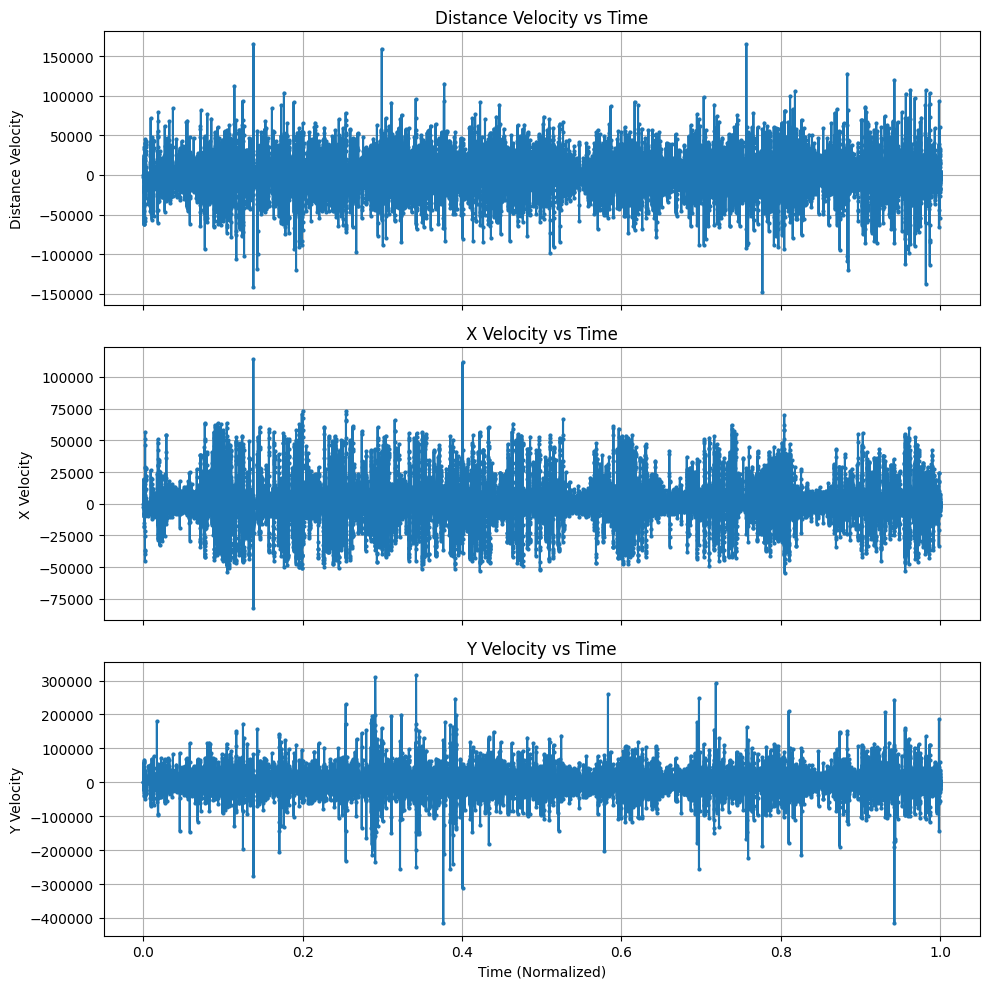

In [27]:
df_new = df_new.fillna(0)

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df_new["t"], df_new["d_vel"], marker='o', linestyle='-', markersize=2)
axs[0].set_ylabel("Distance Velocity")
axs[0].set_title("Distance Velocity vs Time")
axs[0].grid(True)

axs[1].plot(df_new["t"], df_new["x_vel"], marker='o', linestyle='-', markersize=2)
axs[1].set_ylabel("X Velocity")
axs[1].set_title("X Velocity vs Time")
axs[1].grid(True)

axs[2].plot(df_new["t"], df_new["y_vel"], marker='o', linestyle='-', markersize=2)
axs[2].set_xlabel("Time (Normalized)")
axs[2].set_ylabel("Y Velocity")
axs[2].set_title("Y Velocity vs Time")
axs[2].grid(True)

plt.tight_layout()
plt.show()

## angular velocity

In [28]:
df_new["theta"] = np.arctan2(df_new["y"], df_new["x"])
df_new["theta_vel"] = df_new["theta"].diff() / df_new["t"].diff()

df_new = df_new.fillna(0)

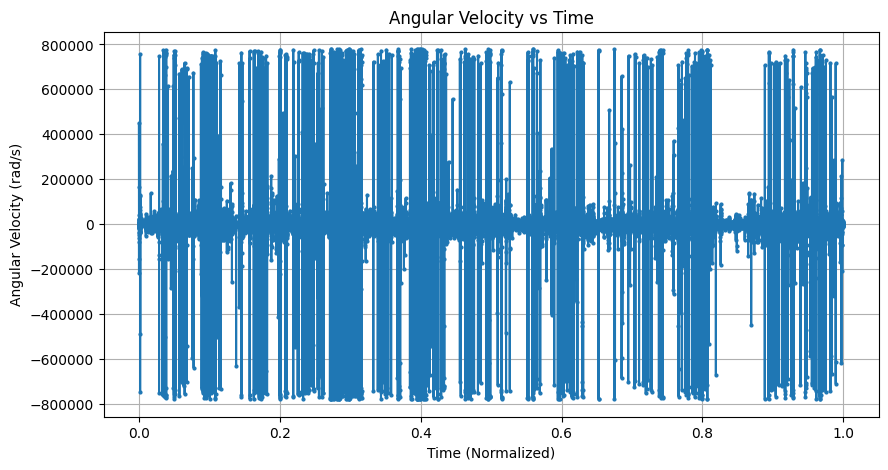

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df_new["t"], df_new["theta_vel"], marker='o', linestyle='-', markersize=2)
plt.xlabel("Time (Normalized)")
plt.ylabel("Angular Velocity (rad/s)")
plt.title("Angular Velocity vs Time")
plt.grid(True)
plt.show()

## fft

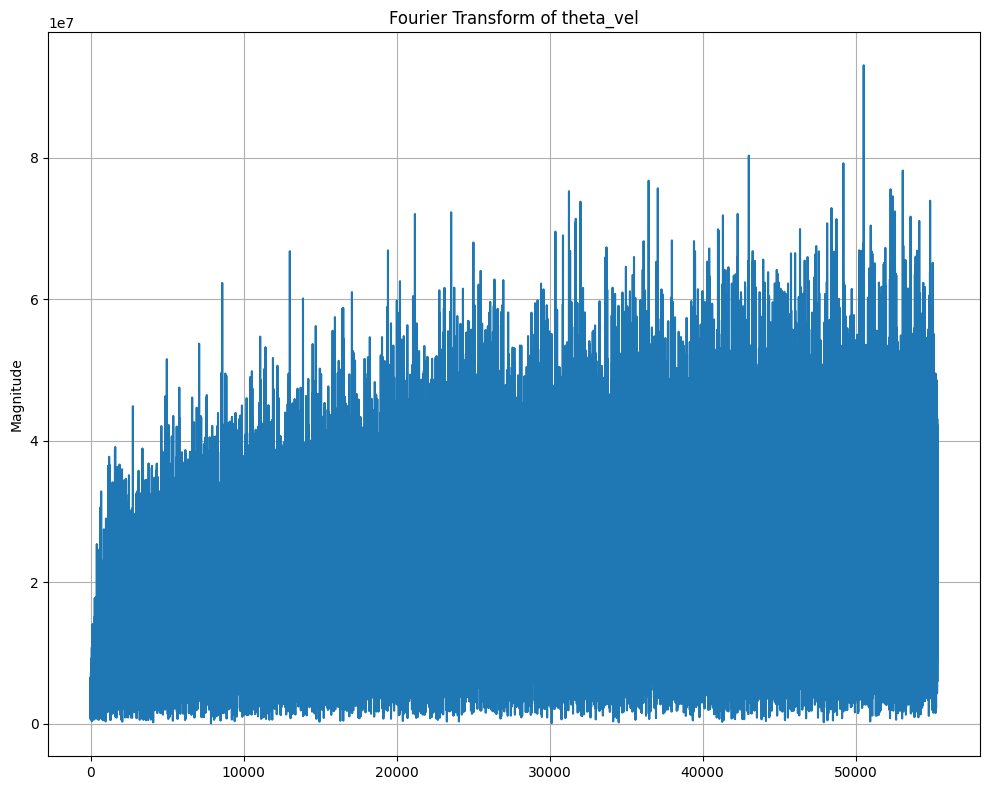

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def fft_column(col_name):
    sampling_rate = 1 / np.mean(np.diff(df_new["t"]))
    
    fft = np.fft.fft(df_new[col_name])
    freqs = np.fft.fftfreq(len(df_new[col_name]), d=1/sampling_rate)
    
    fig, axs = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
    
    axs.plot(freqs[:len(freqs)//2], np.abs(fft[:len(d_fft)//2]))
    axs.set_ylabel("Magnitude")
    axs.set_title(f"Fourier Transform of {col_name}")
    axs.grid(True)
    
    plt.tight_layout()
    plt.show()

fft_column('theta_vel')

## spectogram

In [34]:
from scipy.signal import spectrogram

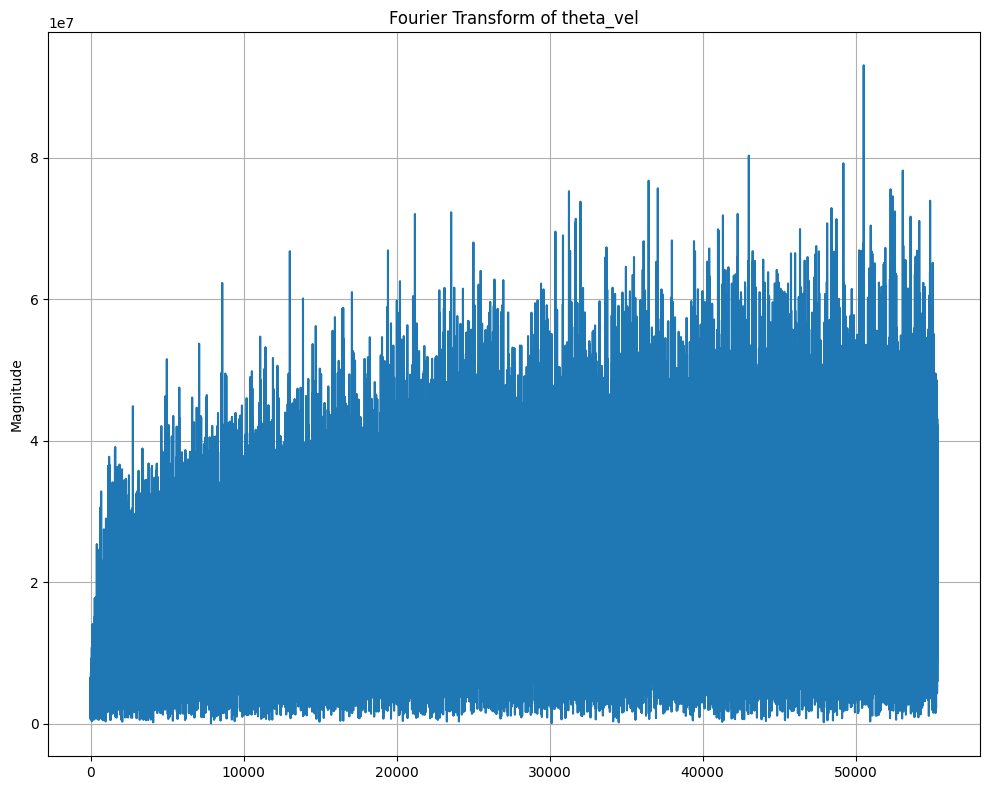

In [43]:
fft_column('theta_vel')

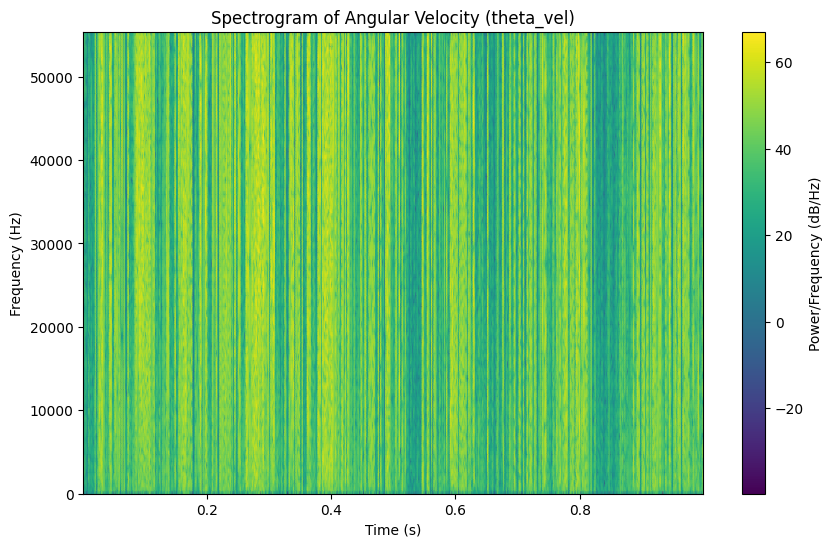

In [35]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["theta_vel"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of Angular Velocity (theta_vel)")
plt.show()

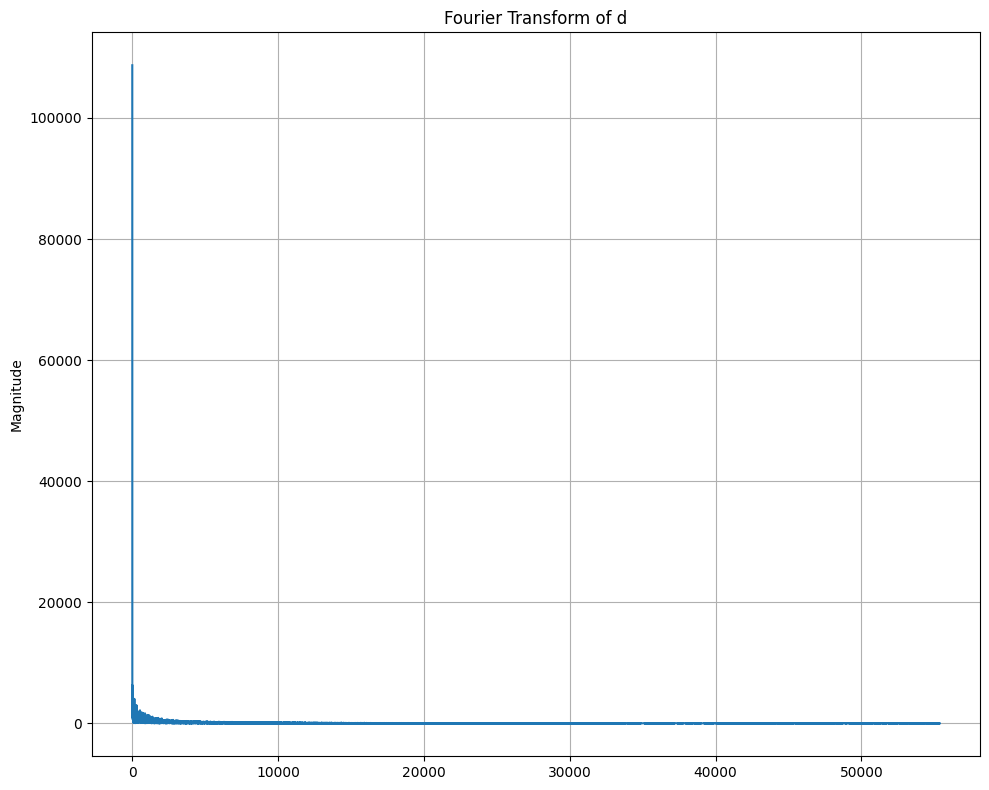

In [44]:
fft_column('d')

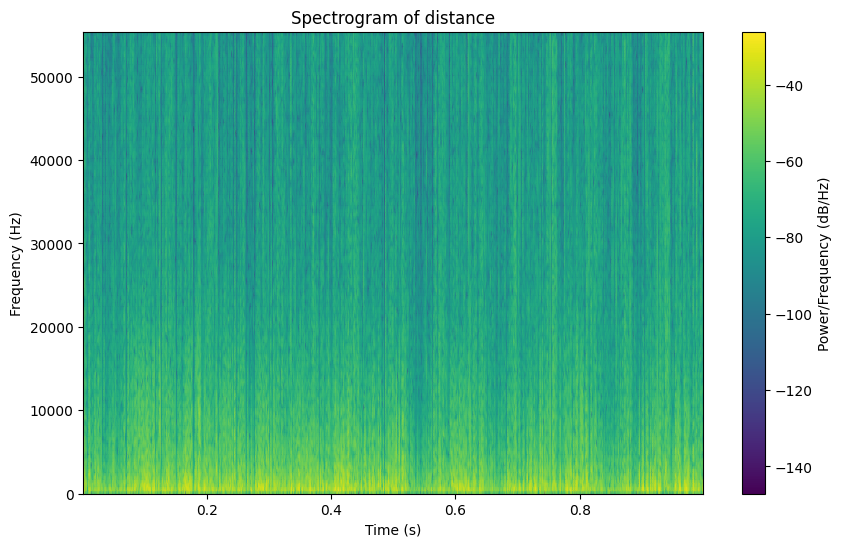

In [36]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["d"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of distance")
plt.show()

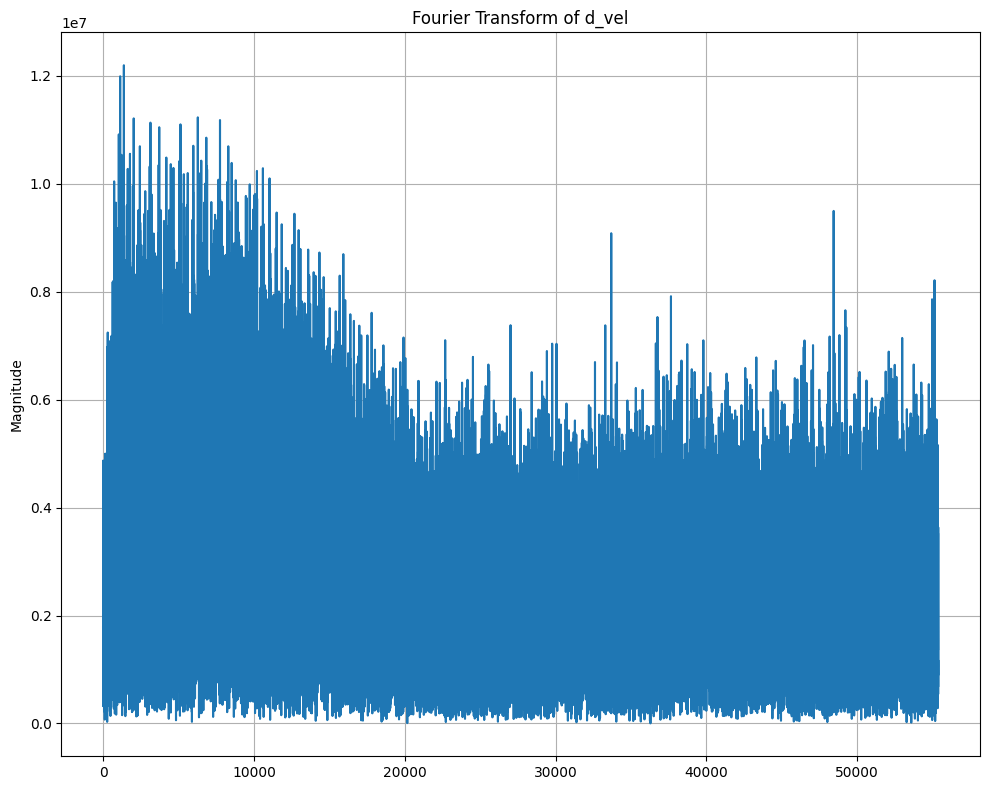

In [45]:
fft_column('d_vel')

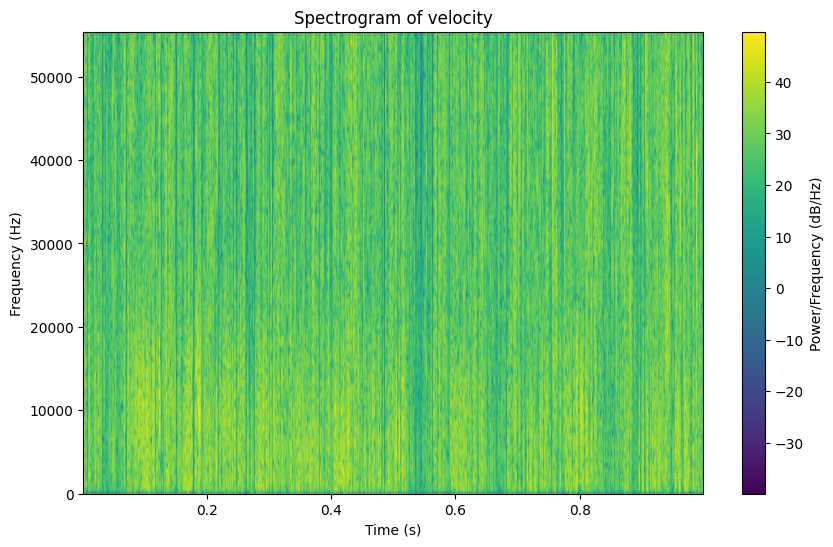

In [37]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["d_vel"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of velocity")
plt.show()

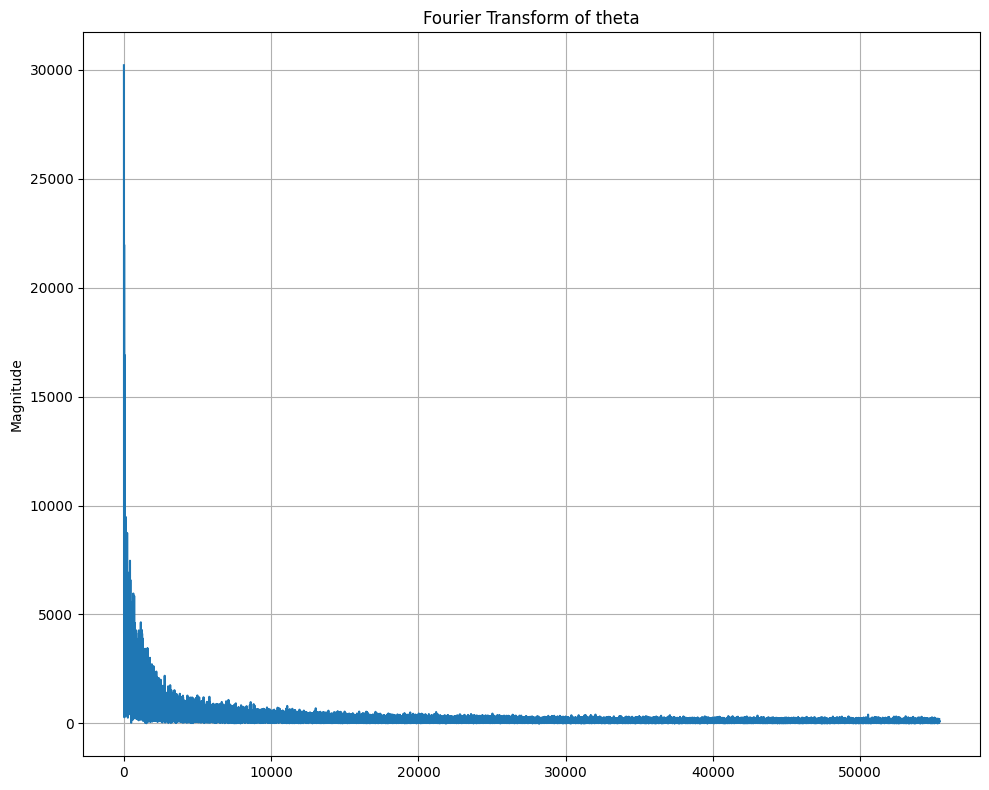

In [46]:
fft_column('theta')

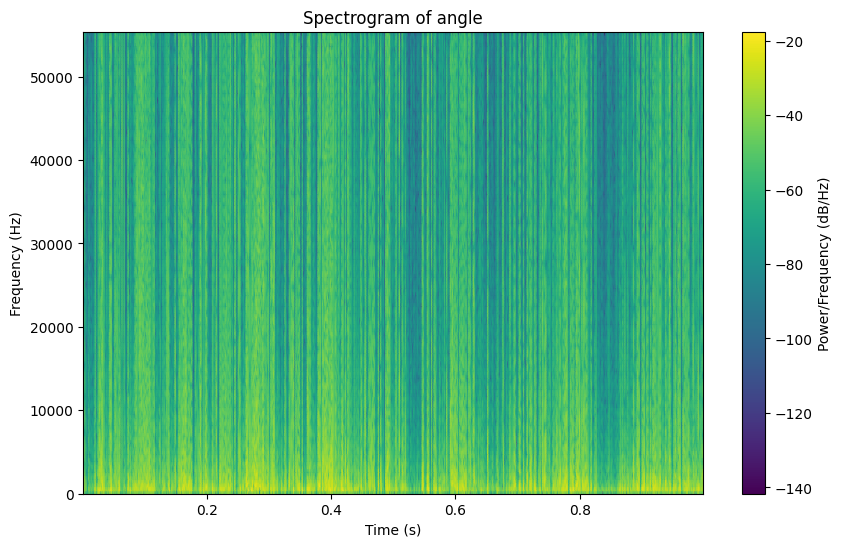

In [38]:
fs = 1 / np.mean(np.diff(df_new["t"]))  
f, t, Sxx = spectrogram(df_new["theta"], fs=fs, nperseg=256, noverlap=128)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of angle")
plt.show()

## filtering high freq